In [1]:
%matplotlib inline

In [2]:
import os
import sqlite3
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import datetime as dt
import matplotlib.dates as mdates
from PyAstronomy import pyasl

pd.set_option('display.max_columns', 100)

#### Create the sqlite connection, print the names of the tables in the .db file

In [3]:
conn = sqlite3.connect('data/crime_census_weather_tod.db')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('violent_crimes',), ('property_crmes',), ('all_crimes',)]


#### Create a dataframe from the 'all_crimes' table

In [4]:
conn = sqlite3.connect('data/crime_census_weather_tod.db')
df = pd.read_sql_query("SELECT * FROM all_crimes", conn)
conn.close()

In [5]:
df.head(5)

,level_0,BLOCK_GROUP,year,month,day,tod,offensegroup,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_bearing,wind_gust,wind_speed,index,TotalPop,TPopMargin,UnWgtSampleCtPop,PerCapitaIncome,PerCapIncMargin,MedianHouseholdInc,MedHouseholdIncMargin,MedianAge,MedianAgeMargin,HousingUnits,HousingUnitsMargin,UnweightedSampleHousingUnits,State,County,Tract,BlockGroup,census_year
0,0,000100 1,2007,9,10,Morning,1,85.76,0.52,69.99,0.67,0.0,0.0,1015.85,81.95,3.0,6.59,321.0,3.72,1.19,00010012007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
1,1,000100 1,2007,12,1,Afternoon,1,39.42,0.15,11.99,0.29,0.0,0.0,1031.59,41.80,1.0,6.44,338.0,11.12,3.97,00010012007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
2,2,000100 1,2008,4,27,Afternoon,1,55.49,1.00,51.42,0.86,0.0,0.0,1021.27,55.49,4.0,4.17,46.0,6.77,2.89,00010012008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
3,3,000100 1,2008,5,1,Evening,1,67.75,0.13,50.17,0.53,0.0,0.0,1016.06,67.75,1.0,6.64,129.0,4.91,1.91,00010012008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
4,4,000100 1,2008,6,1,Evening,1,78.18,0.36,55.85,0.46,0.0,0.0,1008.60,78.18,0.0,6.37,283.0,9.99,3.94,00010012008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None


In [6]:
df.dtypes

level_0                           int64
BLOCK_GROUP                      object
year                             object
month                            object
day                              object
tod                              object
offensegroup                      int64
apparent_temp                   float64
cloud_cover                     float64
dew_point                       float64
humidity                        float64
percip_intensity                float64
percip_probability              float64
pressure                        float64
temperature                     float64
uv_index                        float64
visibility                      float64
wind_bearing                    float64
wind_gust                       float64
wind_speed                      float64
index                            object
TotalPop                        float64
TPopMargin                      float64
UnWgtSampleCtPop                float64
PerCapitaIncome                 float64


In [7]:
df.isnull().sum(axis = 0)

level_0                              0
BLOCK_GROUP                          0
year                                 0
month                                0
day                                  0
tod                                  0
offensegroup                         0
apparent_temp                       72
cloud_cover                         97
dew_point                           89
humidity                            89
percip_intensity                    99
percip_probability                  99
pressure                            76
temperature                         72
uv_index                            85
visibility                          88
wind_bearing                     11900
wind_gust                          264
wind_speed                          73
index                                0
TotalPop                        171120
TPopMargin                      171120
UnWgtSampleCtPop                171120
PerCapitaIncome                 171120
PerCapIncMargin          

In [8]:
df1 = df[df.TotalPop.notnull()]
df2 = df1[df.wind_bearing.notnull()]
df3 = df2[df.wind_gust.notnull()]

/Users/DanSchorer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/DanSchorer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df3.isnull().sum(axis = 0)

level_0                         0
BLOCK_GROUP                     0
year                            0
month                           0
day                             0
tod                             0
offensegroup                    0
apparent_temp                   0
cloud_cover                     0
dew_point                       0
humidity                        0
percip_intensity                0
percip_probability              0
pressure                        0
temperature                     0
uv_index                        0
visibility                      0
wind_bearing                    0
wind_gust                       0
wind_speed                      0
index                           0
TotalPop                        0
TPopMargin                      0
UnWgtSampleCtPop                0
PerCapitaIncome                 0
PerCapIncMargin                 0
MedianHouseholdInc              0
MedHouseholdIncMargin           0
MedianAge                       0
MedianAgeMargi

In [10]:
df4 = df3.astype({'year': int,
                  'month': int,
                  'day': int,
                  'BLOCK_GROUP': str})

In [11]:
df4.dtypes

level_0                           int64
BLOCK_GROUP                      object
year                              int64
month                             int64
day                               int64
tod                              object
offensegroup                      int64
apparent_temp                   float64
cloud_cover                     float64
dew_point                       float64
humidity                        float64
percip_intensity                float64
percip_probability              float64
pressure                        float64
temperature                     float64
uv_index                        float64
visibility                      float64
wind_bearing                    float64
wind_gust                       float64
wind_speed                      float64
index                            object
TotalPop                        float64
TPopMargin                      float64
UnWgtSampleCtPop                float64
PerCapitaIncome                 float64


In [12]:
dff = df4[df4.year > 2012]

In [13]:
dff['year'].unique()

array([2013, 2014, 2015, 2016, 2017])

In [14]:
dff = dff.reset_index(drop=True)

In [15]:
for index, row in dff.iterrows():
    hour = 0
    minu= 0
    if dff['tod'][index] == 'Midnight':
        hour = 1
        minu= 30
    elif dff['tod'][index] == 'Early Morning':
        hour = 4
        minu= 30
    elif dff['tod'][index] == 'Morning':
        hour = 9
        minu = 0
    elif dff['tod'][index] == 'Afternoon':
        hour = 15
        minu = 0
    elif dff['tod'][index] == 'Evening':
        hour = 17
        minu = 30
    elif dff['tod'][index] == 'Night':
        hour = 22
        minu = 30
        
    dff.loc[index,'Date'] = dt.datetime(dff['year'][index], dff['month'][index], dff['day'][index], hour, minu, 0)

In [16]:
for index, row in dff.iterrows():
    dff.loc[index,'Weekday'] = dff['Date'][index].weekday()

In [18]:
dff.head(50)

,level_0,BLOCK_GROUP,year,month,day,tod,offensegroup,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_bearing,wind_gust,wind_speed,index,TotalPop,TPopMargin,UnWgtSampleCtPop,PerCapitaIncome,PerCapIncMargin,MedianHouseholdInc,MedHouseholdIncMargin,MedianAge,MedianAgeMargin,HousingUnits,HousingUnitsMargin,UnweightedSampleHousingUnits,State,County,Tract,BlockGroup,census_year,Date,Weekday
0,139,000100 1,2013,1,10,Early Morning,1,44.430,0.340,27.770,0.520,0.0000,0.00,1031.65,44.430,0.0,5.77,330.0,2.49,0.740,00010012013,1240.0,306.0,67.0,109147.0,30185.0,104083.0,29431.0,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,2013-01-10 04:30:00,3.0
1,140,000100 1,2013,1,30,Night,1,57.280,0.980,55.380,0.930,0.1323,0.99,996.10,57.280,0.0,3.57,110.0,4.92,1.330,00010012013,1240.0,306.0,67.0,109147.0,30185.0,104083.0,29431.0,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,2013-01-30 22:30:00,2.0
2,141,000100 1,2013,2,4,Evening,1,32.680,0.910,18.640,0.560,0.0000,0.00,1015.17,32.680,0.0,6.67,161.0,1.22,0.360,00010012013,1240.0,306.0,67.0,109147.0,30185.0,104083.0,29431.0,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,2013-02-04 17:30:00,0.0
3,142,000100 1,2013,2,14,Afternoon,1,43.850,0.000,28.660,0.550,0.0053,0.22,1016.32,43.850,4.0,6.54,305.0,6.58,2.490,00010012013,1240.0,306.0,67.0,109147.0,30185.0,104083.0,29431.0,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,2013-02-14 15:00:00,3.0
4,143,000100 1,2013,3,8,Afternoon,1,44.840,0.720,27.550,0.440,0.0000,0.00,1020.88,48.260,1.0,6.40,339.0,16.90,7.550,00010012013,1240.0,306.0,67.0,109147.0,30185.0,104083.0,29431.0,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,2013-03-08 15:00:00,4.0
5,144,000100 1,2013,3,19,Afternoon,1,57.090,0.200,35.080,0.430,0.0000,0.00,1006.70,57.090,4.0,6.27,261.0,12.19,4.200,00010012013,1240.0,306.0,67.0,109147.0,30185.0,104083.0,29431.0,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,2013-03-19 15:00:00,1.0
6,145,000100 1,2013,3,19,Morning,1,36.650,1.000,34.970,0.940,0.0000,0.00,1008.87,36.650,0.0,4.64,294.0,2.05,0.670,00010012013,1240.0,306.0,67.0,109147.0,30185.0,104083.0,29431.0,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,2013-03-19 09:00:00,1.0
7,146,000100 1,2013,4,3,Evening,1,41.220,0.050,11.290,0.260,0.0000,0.00,1026.44,43.770,0.0,6.64,346.0,12.73,4.560,00010012013,1240.0,306.0,67.0,109147.0,30185.0,104083.0,29431.0,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,2013-04-03 17:30:00,2.0
8,147,000100 1,2013,4,11,Afternoon,1,82.130,0.110,58.430,0.450,0.0000,0.00,1010.66,82.110,8.0,6.52,144.0,6.63,1.940,00010012013,1240.0,306.0,67.0,109147.0,30185.0,104083.0,29431.0,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,2013-04-11 15:00:00,3.0
9,149,000100 1,2013,5,8,Afternoon,1,61.690,0.940,54.940,0.790,0.0157,0.55,1014.60,61.690,3.0,6.55,191.0,5.77,1.240,00010012013,1240.0,306.0,67.0,109147.0,30185.0,104083.0,29431.0,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,2013-05-08 15:00:00,2.0


In [19]:
dff['TotalPop'].describe()

count    157040.000000
mean       1634.277980
std         776.110254
min         222.000000
25%        1039.000000
50%        1494.000000
75%        2047.000000
max        5407.000000
Name: TotalPop, dtype: float64

In [20]:
for index, row in dff.iterrows():
    dff.loc[index,'CrimeRate'] = dff['offensegroup'][index] / dff['TotalPop'][index] * 100000

In [21]:
dff['CrimeRate'].describe()

count    157040.000000
mean         81.915292
std          48.948227
min          18.494544
25%          50.890585
50%          69.589422
75%         100.100100
max        1136.363636
Name: CrimeRate, dtype: float64

In [29]:
dff['TotalPop'].describe()

count    157040.000000
mean       1634.277980
std         776.110254
min         222.000000
25%        1039.000000
50%        1494.000000
75%        2047.000000
max        5407.000000
Name: TotalPop, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x144778e80>],
 'caps': [<matplotlib.lines.Line2D at 0x144760240>,
 'fliers': [<matplotlib.lines.Line2D at 0x144757b70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x144757320>],
 'whiskers': [<matplotlib.lines.Line2D at 0x14476b0b8>,
  <matplotlib.lines.Line2D at 0x14476b9e8>]}

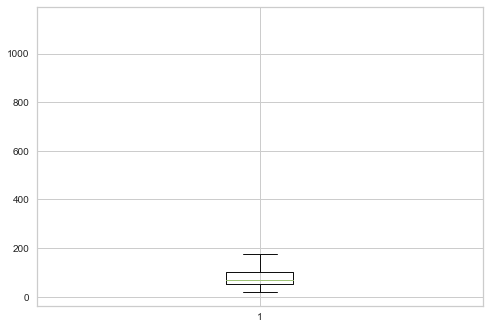

In [24]:
plt.boxplot(dff.CrimeRate)

(array([3.9000e+03, 1.6610e+04, 2.1057e+04, 2.4291e+04, 2.0875e+04,
        1.5627e+04, 1.1163e+04, 1.0962e+04, 8.2830e+03, 6.2100e+03,
        4.4110e+03, 3.1500e+03, 2.5680e+03, 1.6620e+03, 1.2020e+03,
        9.0700e+02, 6.7900e+02, 2.7800e+02, 3.3400e+02, 4.6300e+02,
        5.6600e+02, 2.0800e+02, 1.3400e+02, 2.3300e+02, 4.0000e+01,
        2.0900e+02, 1.0200e+02, 1.0100e+02, 1.5400e+02, 9.1000e+01,
        1.4100e+02, 4.3000e+01, 3.3000e+01, 8.4000e+01, 2.2000e+01,
        1.3000e+01, 1.0000e+01, 6.0000e+00, 1.0200e+02, 5.0000e+00,
        1.0000e+01, 1.8000e+01, 2.7000e+01, 1.9000e+01, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 4.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 5.0000e+00, 2.0000e+00, 0.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

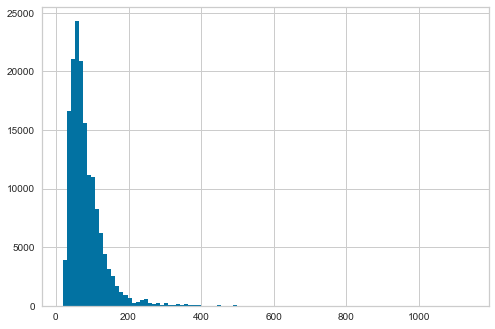

In [28]:
plt.hist(dff.CrimeRate, bins = 100)

In [37]:
dff = dff.reset_index(drop=True)

In [51]:
for index, row in dff.iterrows():
    
    rate = dff.loc[index,'CrimeRate']
    
    if rate < 45:
        dff.loc[index,'CrimeCategory'] = 'Low'
        
    elif rate >= 45 and rate < 75:
        dff.loc[index,'CrimeCategory'] = 'LowMed'
        
    elif rate >= 75 and rate < 110:
        dff.loc[index,'CrimeCategory'] = 'Med'
        
    elif rate >= 110:
        dff.loc[index,'CrimeCategory'] = 'High'

In [39]:
dff.head()

,level_0,BLOCK_GROUP,year,month,day,tod,offensegroup,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_bearing,wind_gust,wind_speed,index,TotalPop,TPopMargin,UnWgtSampleCtPop,PerCapitaIncome,PerCapIncMargin,MedianHouseholdInc,MedHouseholdIncMargin,MedianAge,MedianAgeMargin,HousingUnits,HousingUnitsMargin,UnweightedSampleHousingUnits,State,County,Tract,BlockGroup,census_year,Date,Weekday,CrimeRate,CrimeCategory
0,139,000100 1,2013,1,10,Early Morning,1,44.43,0.34,27.77,0.52,0.0000,0.00,1031.65,44.43,0.0,5.77,330.0,2.49,0.74,00010012013,1240.0,306.0,67.0,109147.0,30185.0,104083.0,29431.0,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,2013-01-10 04:30:00,3.0,80.645161,LowMed
1,140,000100 1,2013,1,30,Night,1,57.28,0.98,55.38,0.93,0.1323,0.99,996.10,57.28,0.0,3.57,110.0,4.92,1.33,00010012013,1240.0,306.0,67.0,109147.0,30185.0,104083.0,29431.0,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,2013-01-30 22:30:00,2.0,80.645161,LowMed
2,141,000100 1,2013,2,4,Evening,1,32.68,0.91,18.64,0.56,0.0000,0.00,1015.17,32.68,0.0,6.67,161.0,1.22,0.36,00010012013,1240.0,306.0,67.0,109147.0,30185.0,104083.0,29431.0,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,2013-02-04 17:30:00,0.0,80.645161,LowMed
3,142,000100 1,2013,2,14,Afternoon,1,43.85,0.00,28.66,0.55,0.0053,0.22,1016.32,43.85,4.0,6.54,305.0,6.58,2.49,00010012013,1240.0,306.0,67.0,109147.0,30185.0,104083.0,29431.0,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,2013-02-14 15:00:00,3.0,80.645161,LowMed
4,143,000100 1,2013,3,8,Afternoon,1,44.84,0.72,27.55,0.44,0.0000,0.00,1020.88,48.26,1.0,6.40,339.0,16.90,7.55,00010012013,1240.0,306.0,67.0,109147.0,30185.0,104083.0,29431.0,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,2013-03-08 15:00:00,4.0,80.645161,LowMed


In [48]:
order = ['Low', 'LowMed', 'Med', 'High']

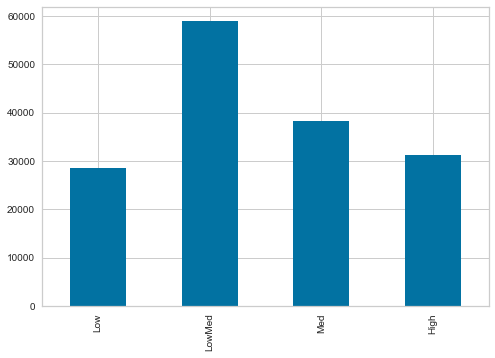

In [52]:
dff['CrimeCategory'].value_counts().loc[order].plot(kind='bar')

In [56]:
final_df = dff.drop(['level_0','index', 'TPopMargin', 'UnWgtSampleCtPop', 'PerCapIncMargin', 'MedHouseholdIncMargin', 'MedianAgeMargin', 'HousingUnitsMargin', 'UnweightedSampleHousingUnits', 'State', 'County', 'Tract', 'BlockGroup', 'census_year'], axis=1)

In [57]:
final_df.head()

,BLOCK_GROUP,year,month,day,tod,offensegroup,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_bearing,wind_gust,wind_speed,TotalPop,PerCapitaIncome,MedianHouseholdInc,MedianAge,HousingUnits,Date,Weekday,CrimeRate,CrimeCategory
0,000100 1,2013,1,10,Early Morning,1,44.43,0.34,27.77,0.52,0.0000,0.00,1031.65,44.43,0.0,5.77,330.0,2.49,0.74,1240.0,109147.0,104083.0,37.0,743.0,2013-01-10 04:30:00,3.0,80.645161,Med
1,000100 1,2013,1,30,Night,1,57.28,0.98,55.38,0.93,0.1323,0.99,996.10,57.28,0.0,3.57,110.0,4.92,1.33,1240.0,109147.0,104083.0,37.0,743.0,2013-01-30 22:30:00,2.0,80.645161,Med
2,000100 1,2013,2,4,Evening,1,32.68,0.91,18.64,0.56,0.0000,0.00,1015.17,32.68,0.0,6.67,161.0,1.22,0.36,1240.0,109147.0,104083.0,37.0,743.0,2013-02-04 17:30:00,0.0,80.645161,Med
3,000100 1,2013,2,14,Afternoon,1,43.85,0.00,28.66,0.55,0.0053,0.22,1016.32,43.85,4.0,6.54,305.0,6.58,2.49,1240.0,109147.0,104083.0,37.0,743.0,2013-02-14 15:00:00,3.0,80.645161,Med
4,000100 1,2013,3,8,Afternoon,1,44.84,0.72,27.55,0.44,0.0000,0.00,1020.88,48.26,1.0,6.40,339.0,16.90,7.55,1240.0,109147.0,104083.0,37.0,743.0,2013-03-08 15:00:00,4.0,80.645161,Med


In [75]:
for index, row in final_df.iterrows():
    text = final_df.loc[index,'BLOCK_GROUP']
    text2 = text.replace(" ", "")
    final_df.loc[index,'BlockGroup'] = text2 

In [76]:
final_df.tail(100)

,BLOCK_GROUP,year,month,day,tod,offensegroup,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_bearing,wind_gust,wind_speed,TotalPop,PerCapitaIncome,MedianHouseholdInc,MedianAge,HousingUnits,Date,Weekday,CrimeRate,CrimeCategory,BlockGroup
156940,011100 3,2017,7,6,Evening,1,77.380000,0.920,72.150,0.880000,0.0026,0.15,1014.070,75.950,0.0,7.960,55.000000,2.580000,1.020,1686.0,19928.0,32250.0,52.7,574.0,2017-07-06 17:30:00,3.0,59.311981,LowMed,0111003
156941,011100 3,2017,7,6,Midnight,1,73.920000,0.910,70.160,0.920000,0.0017,0.22,1018.890,72.630,0.0,5.710,88.000000,1.570000,0.550,1686.0,19928.0,32250.0,52.7,574.0,2017-07-06 01:30:00,3.0,59.311981,LowMed,0111003
156942,011100 3,2017,7,6,Night,2,75.630000,0.955,71.465,0.910000,0.0055,0.42,1013.925,74.225,0.0,7.470,80.000000,0.845000,0.300,1686.0,19928.0,32250.0,52.7,574.0,2017-07-06 22:30:00,3.0,118.623962,High,0111003
156943,011100 3,2017,7,7,Night,1,75.900000,0.190,66.360,0.740000,0.0000,0.00,1009.460,75.200,0.0,7.360,241.000000,0.950000,0.210,1686.0,19928.0,32250.0,52.7,574.0,2017-07-07 22:30:00,4.0,59.311981,LowMed,0111003
156944,011100 3,2017,7,10,Morning,1,85.240000,0.440,68.360,0.630000,0.0000,0.00,1018.390,82.130,6.0,8.210,217.000000,3.520000,0.740,1686.0,19928.0,32250.0,52.7,574.0,2017-07-10 09:00:00,0.0,59.311981,LowMed,0111003
156945,011100 3,2017,7,11,Evening,1,92.200000,0.480,70.260,0.580000,0.0000,0.00,1014.580,87.040,1.0,8.250,240.000000,3.110000,1.030,1686.0,19928.0,32250.0,52.7,574.0,2017-07-11 17:30:00,1.0,59.311981,LowMed,0111003
156946,011100 3,2017,7,12,Morning,1,75.080000,0.350,68.920,0.840000,0.0000,0.00,1017.070,74.020,0.0,9.570,248.000000,0.770000,0.260,1686.0,19928.0,32250.0,52.7,574.0,2017-07-12 09:00:00,2.0,59.311981,LowMed,0111003
156947,011100 3,2017,7,15,Afternoon,1,88.460000,0.370,64.090,0.470000,0.0000,0.00,1013.540,87.070,4.0,8.360,317.000000,6.190000,2.150,1686.0,19928.0,32250.0,52.7,574.0,2017-07-15 15:00:00,5.0,59.311981,LowMed,0111003
156948,011100 3,2017,7,16,Early Morning,1,68.690000,0.000,62.590,0.820000,0.0000,0.00,1014.830,68.300,0.0,8.680,301.000000,0.320000,0.150,1686.0,19928.0,32250.0,52.7,574.0,2017-07-16 04:30:00,6.0,59.311981,LowMed,0111003
156949,011100 3,2017,7,16,Midnight,2,70.895000,0.055,63.545,0.785000,0.0000,0.00,1015.265,70.445,0.0,8.335,319.500000,0.330000,0.145,1686.0,19928.0,32250.0,52.7,574.0,2017-07-16 01:30:00,6.0,118.623962,High,0111003


In [77]:
final_df.dtypes

BLOCK_GROUP                   object
year                           int64
month                          int64
day                            int64
tod                           object
offensegroup                   int64
apparent_temp                float64
cloud_cover                  float64
dew_point                    float64
humidity                     float64
percip_intensity             float64
percip_probability           float64
pressure                     float64
temperature                  float64
uv_index                     float64
visibility                   float64
wind_bearing                 float64
wind_gust                    float64
wind_speed                   float64
TotalPop                     float64
PerCapitaIncome              float64
MedianHouseholdInc           float64
MedianAge                    float64
HousingUnits                 float64
Date                  datetime64[ns]
Weekday                      float64
CrimeRate                    float64
C

In [102]:
final_df2 = final_df.drop('BLOCK_GROUP', axis =1)

In [93]:
final_df2.head(5)

,year,month,day,tod,offensegroup,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_bearing,wind_gust,wind_speed,TotalPop,PerCapitaIncome,MedianHouseholdInc,MedianAge,HousingUnits,Date,Weekday,CrimeRate,CrimeCategory,BlockGroup
0,2013,1,10,Early Morning,1,44.43,0.34,27.77,0.52,0.0000,0.00,1031.65,44.43,0.0,5.77,330.0,2.49,0.74,1240.0,109147.0,104083.0,37.0,743.0,2013-01-10 04:30:00,3.0,80.645161,Med,0001001
1,2013,1,30,Night,1,57.28,0.98,55.38,0.93,0.1323,0.99,996.10,57.28,0.0,3.57,110.0,4.92,1.33,1240.0,109147.0,104083.0,37.0,743.0,2013-01-30 22:30:00,2.0,80.645161,Med,0001001
2,2013,2,4,Evening,1,32.68,0.91,18.64,0.56,0.0000,0.00,1015.17,32.68,0.0,6.67,161.0,1.22,0.36,1240.0,109147.0,104083.0,37.0,743.0,2013-02-04 17:30:00,0.0,80.645161,Med,0001001
3,2013,2,14,Afternoon,1,43.85,0.00,28.66,0.55,0.0053,0.22,1016.32,43.85,4.0,6.54,305.0,6.58,2.49,1240.0,109147.0,104083.0,37.0,743.0,2013-02-14 15:00:00,3.0,80.645161,Med,0001001
4,2013,3,8,Afternoon,1,44.84,0.72,27.55,0.44,0.0000,0.00,1020.88,48.26,1.0,6.40,339.0,16.90,7.55,1240.0,109147.0,104083.0,37.0,743.0,2013-03-08 15:00:00,4.0,80.645161,Med,0001001


In [84]:
final_df2.to_csv('data/CrimeData.csv', sep=',', encoding='utf-8')

In [94]:
final_df2.head()

,year,month,day,tod,offensegroup,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_bearing,wind_gust,wind_speed,TotalPop,PerCapitaIncome,MedianHouseholdInc,MedianAge,HousingUnits,Date,Weekday,CrimeRate,CrimeCategory,BlockGroup
0,2013,1,10,Early Morning,1,44.43,0.34,27.77,0.52,0.0000,0.00,1031.65,44.43,0.0,5.77,330.0,2.49,0.74,1240.0,109147.0,104083.0,37.0,743.0,2013-01-10 04:30:00,3.0,80.645161,Med,0001001
1,2013,1,30,Night,1,57.28,0.98,55.38,0.93,0.1323,0.99,996.10,57.28,0.0,3.57,110.0,4.92,1.33,1240.0,109147.0,104083.0,37.0,743.0,2013-01-30 22:30:00,2.0,80.645161,Med,0001001
2,2013,2,4,Evening,1,32.68,0.91,18.64,0.56,0.0000,0.00,1015.17,32.68,0.0,6.67,161.0,1.22,0.36,1240.0,109147.0,104083.0,37.0,743.0,2013-02-04 17:30:00,0.0,80.645161,Med,0001001
3,2013,2,14,Afternoon,1,43.85,0.00,28.66,0.55,0.0053,0.22,1016.32,43.85,4.0,6.54,305.0,6.58,2.49,1240.0,109147.0,104083.0,37.0,743.0,2013-02-14 15:00:00,3.0,80.645161,Med,0001001
4,2013,3,8,Afternoon,1,44.84,0.72,27.55,0.44,0.0000,0.00,1020.88,48.26,1.0,6.40,339.0,16.90,7.55,1240.0,109147.0,104083.0,37.0,743.0,2013-03-08 15:00:00,4.0,80.645161,Med,0001001


In [103]:
blockGroupDict = final_df2['BlockGroup'].value_counts()
totalLen = len(final_df2.index)

for index, row in final_df2.iterrows():
    bg = final_df2['BlockGroup'][index]
    
    count = blockGroupDict.get(bg, 'Did not find')
    
    final_df2.loc[index,'BlockGroupFreq'] = count / totalLen * 100

In [99]:
final_df2.tail(100)

,year,month,day,tod,offensegroup,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_bearing,wind_gust,wind_speed,TotalPop,PerCapitaIncome,MedianHouseholdInc,MedianAge,HousingUnits,Date,Weekday,CrimeRate,CrimeCategory,BlockGroup,BlockGroupFreq
156940,2017,7,6,Evening,1,77.380000,0.920,72.150,0.880000,0.0026,0.15,1014.070,75.950,0.0,7.960,55.000000,2.580000,1.020,1686.0,19928.0,32250.0,52.7,574.0,2017-07-06 17:30:00,3.0,59.311981,LowMed,0111003,0.594116
156941,2017,7,6,Midnight,1,73.920000,0.910,70.160,0.920000,0.0017,0.22,1018.890,72.630,0.0,5.710,88.000000,1.570000,0.550,1686.0,19928.0,32250.0,52.7,574.0,2017-07-06 01:30:00,3.0,59.311981,LowMed,0111003,0.594116
156942,2017,7,6,Night,2,75.630000,0.955,71.465,0.910000,0.0055,0.42,1013.925,74.225,0.0,7.470,80.000000,0.845000,0.300,1686.0,19928.0,32250.0,52.7,574.0,2017-07-06 22:30:00,3.0,118.623962,High,0111003,0.594116
156943,2017,7,7,Night,1,75.900000,0.190,66.360,0.740000,0.0000,0.00,1009.460,75.200,0.0,7.360,241.000000,0.950000,0.210,1686.0,19928.0,32250.0,52.7,574.0,2017-07-07 22:30:00,4.0,59.311981,LowMed,0111003,0.594116
156944,2017,7,10,Morning,1,85.240000,0.440,68.360,0.630000,0.0000,0.00,1018.390,82.130,6.0,8.210,217.000000,3.520000,0.740,1686.0,19928.0,32250.0,52.7,574.0,2017-07-10 09:00:00,0.0,59.311981,LowMed,0111003,0.594116
156945,2017,7,11,Evening,1,92.200000,0.480,70.260,0.580000,0.0000,0.00,1014.580,87.040,1.0,8.250,240.000000,3.110000,1.030,1686.0,19928.0,32250.0,52.7,574.0,2017-07-11 17:30:00,1.0,59.311981,LowMed,0111003,0.594116
156946,2017,7,12,Morning,1,75.080000,0.350,68.920,0.840000,0.0000,0.00,1017.070,74.020,0.0,9.570,248.000000,0.770000,0.260,1686.0,19928.0,32250.0,52.7,574.0,2017-07-12 09:00:00,2.0,59.311981,LowMed,0111003,0.594116
156947,2017,7,15,Afternoon,1,88.460000,0.370,64.090,0.470000,0.0000,0.00,1013.540,87.070,4.0,8.360,317.000000,6.190000,2.150,1686.0,19928.0,32250.0,52.7,574.0,2017-07-15 15:00:00,5.0,59.311981,LowMed,0111003,0.594116
156948,2017,7,16,Early Morning,1,68.690000,0.000,62.590,0.820000,0.0000,0.00,1014.830,68.300,0.0,8.680,301.000000,0.320000,0.150,1686.0,19928.0,32250.0,52.7,574.0,2017-07-16 04:30:00,6.0,59.311981,LowMed,0111003,0.594116
156949,2017,7,16,Midnight,2,70.895000,0.055,63.545,0.785000,0.0000,0.00,1015.265,70.445,0.0,8.335,319.500000,0.330000,0.145,1686.0,19928.0,32250.0,52.7,574.0,2017-07-16 01:30:00,6.0,118.623962,High,0111003,0.594116


In [105]:
final_df2['BlockGroupFreq'].describe()

count    157040.000000
mean          0.425801
std           0.381026
min           0.000637
25%           0.187213
50%           0.298013
75%           0.536169
max           2.051070
Name: BlockGroupFreq, dtype: float64

In [117]:
for index, row in final_df2.iterrows():
    
    freq = final_df2.loc[index,'BlockGroupFreq']
    
    if freq < .11:
        final_df2.loc[index,'BlockGroupCategory'] = 0
        
    elif freq >= .11 and freq < .19:
        final_df2.loc[index,'BlockGroupCategory'] = 1
        
    elif freq >= .19 and freq < .28:
        final_df2.loc[index,'BlockGroupCategory'] = 2
        
    elif freq >= .28 and freq < .37:
        final_df2.loc[index,'BlockGroupCategory'] = 3
        
    elif freq >= .37 and freq < .53:
        final_df2.loc[index,'BlockGroupCategory'] = 4
        
    elif freq >= .53:
        final_df2.loc[index,'BlockGroupCategory'] = 5

In [107]:
final_df2.head()

,year,month,day,tod,offensegroup,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_bearing,wind_gust,wind_speed,TotalPop,PerCapitaIncome,MedianHouseholdInc,MedianAge,HousingUnits,Date,Weekday,CrimeRate,CrimeCategory,BlockGroup,BlockGroupFreq,BlockGroupCategory
0,2013,1,10,Early Morning,1,44.43,0.34,27.77,0.52,0.0000,0.00,1031.65,44.43,0.0,5.77,330.0,2.49,0.74,1240.0,109147.0,104083.0,37.0,743.0,2013-01-10 04:30:00,3.0,80.645161,Med,0001001,0.086602,5.0
1,2013,1,30,Night,1,57.28,0.98,55.38,0.93,0.1323,0.99,996.10,57.28,0.0,3.57,110.0,4.92,1.33,1240.0,109147.0,104083.0,37.0,743.0,2013-01-30 22:30:00,2.0,80.645161,Med,0001001,0.086602,5.0
2,2013,2,4,Evening,1,32.68,0.91,18.64,0.56,0.0000,0.00,1015.17,32.68,0.0,6.67,161.0,1.22,0.36,1240.0,109147.0,104083.0,37.0,743.0,2013-02-04 17:30:00,0.0,80.645161,Med,0001001,0.086602,5.0
3,2013,2,14,Afternoon,1,43.85,0.00,28.66,0.55,0.0053,0.22,1016.32,43.85,4.0,6.54,305.0,6.58,2.49,1240.0,109147.0,104083.0,37.0,743.0,2013-02-14 15:00:00,3.0,80.645161,Med,0001001,0.086602,5.0
4,2013,3,8,Afternoon,1,44.84,0.72,27.55,0.44,0.0000,0.00,1020.88,48.26,1.0,6.40,339.0,16.90,7.55,1240.0,109147.0,104083.0,37.0,743.0,2013-03-08 15:00:00,4.0,80.645161,Med,0001001,0.086602,5.0


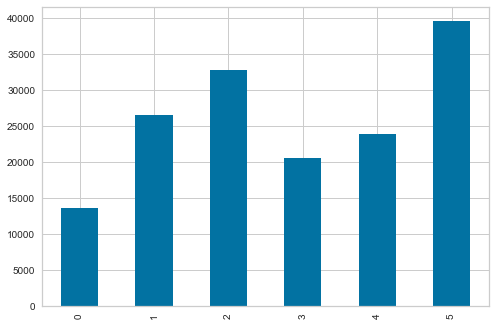

In [118]:
order = [0, 1, 2, 3, 4, 5]
final_df2['BlockGroupCategory'].value_counts().loc[order].plot(kind='bar')

In [111]:
final_df2['BlockGroupCategory'].value_counts()

5.0    157040
Name: BlockGroupCategory, dtype: int64

(array([  254.,   525.,  2536.,  4042.,  4138.,  6236.,  9119.,  5550.,
         5730., 10107.,  9824.,  6285.,  5309.,  6116.,  5622.,  3470.,
         4776.,  3971.,  4185.,  1244.,  5937.,  5547.,  2205.,  1521.,
         1581.,  1641.,  3420.,   871.,  2767.,  1912.,   980.,  3068.,
         1053.,  2159.,  1113.,     0.,  1172.,  1205.,  1238.,  1258.,
            0.,     0.,  1360.,     0.,     0.,     0.,     0.,     0.,
         1577.,  1594.,     0.,     0.,     0.,  3475.,     0.,     0.,
            0.,     0.,     0.,     0.,  1959.,     0.,  1998.,     0.,
            0.,     0.,     0.,  2169.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,  3221.]),
 array([6.36780438e-04, 2.11411105e-02, 4.16454407e-02, 6.21497708e-02,
        8.26541009e-02

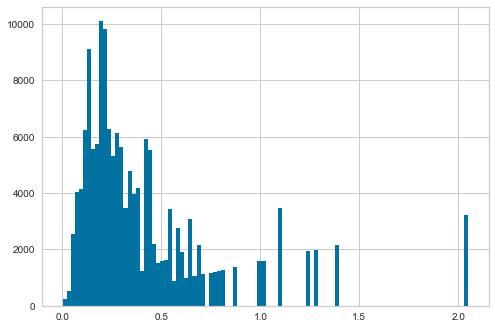

In [112]:
plt.hist(final_df2.BlockGroupFreq, bins = 100)

In [119]:
final_df2.to_csv('data/CrimeData.csv', sep=',', encoding='utf-8')